In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
#read the dataset
path="../input/iris-flower-dataset/IRIS.csv"
data = pd.read_csv(path)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#lets gets some info of the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#lets get some statistical data on the attributes
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#lets see the freuqency of each labels we have.
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

#### For each label, we have 50 data's, so data is equally split between all 3 classes.

## lets perform some pre-processing on data.

In [6]:
#lets check if we have any null values in any column.
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### In each column 0, represents the total number of NULL values in each column, which is NILL here.

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

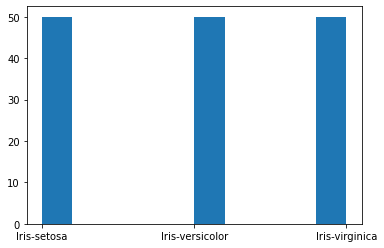

In [7]:
import matplotlib.pyplot as plt
#lets  find the unique values and the frequency for each attribites.
plt.hist(data['species'])

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

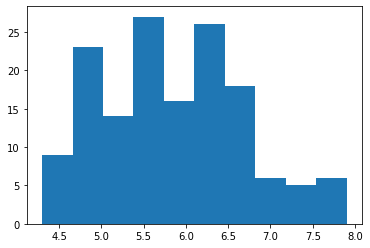

In [8]:
#lets see the same for sepal_length
plt.hist(data['sepal_length'])

#### most of the iris flower sepal length lies between 5.0 to 6.5
#### for speal length 5.5, we have max number of flowers.

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

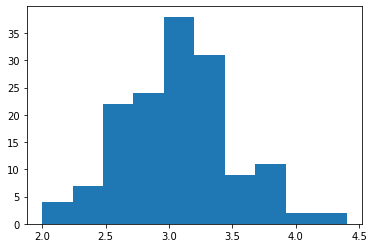

In [9]:
#lets see the same for sepal_width
plt.hist(data['sepal_width'])

#### Max number of flowers have sepal width 3.0.

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

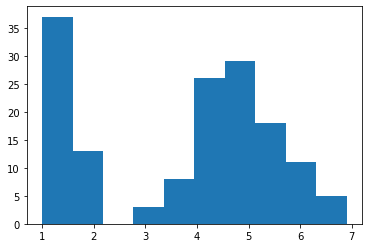

In [10]:
#lets see the same for petal_length
plt.hist(data['petal_length'])

#### This data is not conintuos, which means we dont have any iris flower with petal length in the range 2 to 3.
#### And for smaller petal length, we have max number of flowers.

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

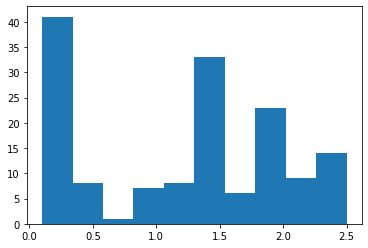

In [11]:
#lets see the same for petal_width
plt.hist(data['petal_width'])

#### here also, for smaller petal width, we have max number of flowers.

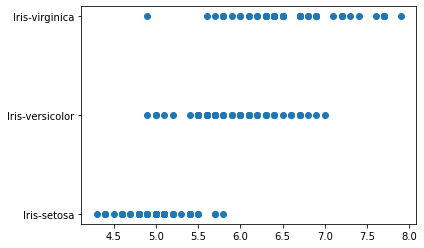

In [12]:
#now lets find the relation between each attributes with each other and with the labels.
#lets see the relationship of sepal length with species.
plt.scatter(data['sepal_length'],data['species'])

#### To some extent, we can say that as we are increasing the sepal length, class of the flower is also changing from setosa to versicolor to virginica.
#### But still, it does not seem linearly seperable.

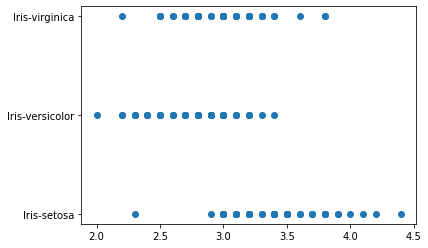

In [13]:
#lets check the same for sepal_width vs species
plt.scatter(data['sepal_width'],data['species'])

#### It also does not seem very much linearly seperable.
#### But we can presume one thing that, after sepal width of 3.8, we will have iris-setosa.

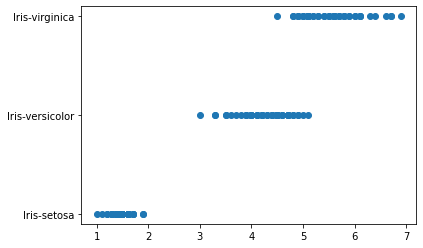

In [14]:
#lets check the same for petal_length
plt.scatter(data['petal_length'],data['species'])

#### As petal length is increasing, classes are also changing, so to some extent it seems a good factor for classification.

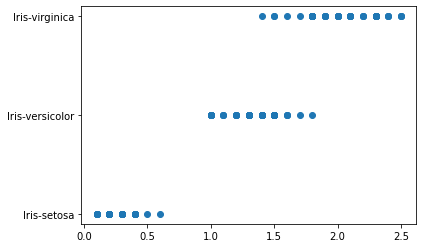

In [15]:
#lets check the same for petal_width vs species
plt.scatter(data['petal_width'],data['species'])

#### It gives similar observation.

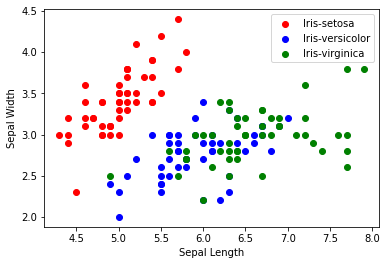

In [16]:
#lets see what combination of sepal length and seapl width has what class of flower.
#lets plot sepal length vs sepal width scatter plot, where the color of the plot represents the class.
colors=['red','blue','green']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
#lets plot for each class one by one on the same graph.
for i in range(3):
    plt.scatter(data[data['species']==species[i]]['sepal_length'],data[data['species']==species[i]]['sepal_width'],color=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
    

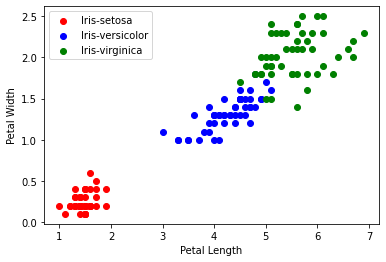

In [17]:
#lets see what combination of petal length and petal width has what class of flower.
#lets plot petal length vs petal width scatter plot, where the color of the plot represents the class.
colors=['red','blue','green']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
#lets plot for each class one by one on the same graph.
for i in range(3):
    plt.scatter(data[data['species']==species[i]]['petal_length'],data[data['species']==species[i]]['petal_width'],color=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
    

#### From the above graph, we can say that it is linearly seperable, but overlaps a little between blue and green.

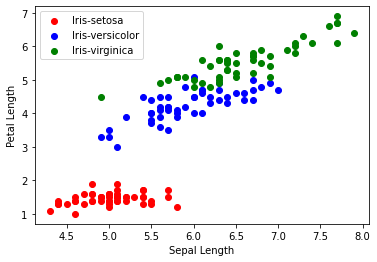

In [18]:
#lets see what combination of sepal length and petal length has what class of flower.
#lets plot sepal length vs petal width scatter plot, where the color of the plot represents the class.
colors=['red','blue','green']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
#lets plot for each class one by one on the same graph.
for i in range(3):
    plt.scatter(data[data['species']==species[i]]['sepal_length'],data[data['species']==species[i]]['petal_length'],color=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
    

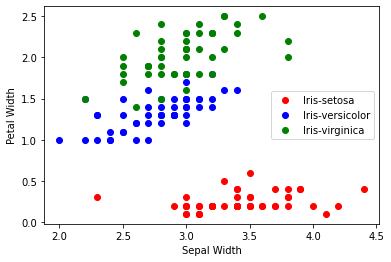

In [19]:
#lets see what combination of sepal width and petal width has what class of flower.
#lets plot sepal width vs petal width scatter plot, where the color of the plot represents the class.
colors=['red','blue','green']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
#lets plot for each class one by one on the same graph.
for i in range(3):
    plt.scatter(data[data['species']==species[i]]['sepal_width'],data[data['species']==species[i]]['petal_width'],color=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
    

#### From the last 3 graphs, we can observe that the these combination of attribites are good factors for classifying the labels.

In [20]:
#lets use correlation matrix to understand the relation or strength between attributes mathematically.
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

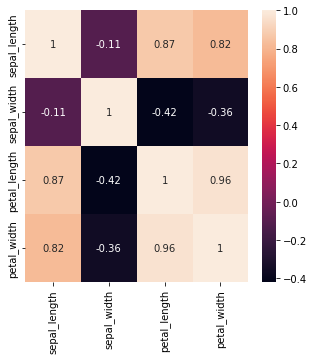

In [21]:
#we can visualize it even with the help of heatmap.
import seaborn as sns
corr = data.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax) #annot is annotations which is correlation data, 
#making it true means, it will be visible in the graph.


#### Lighter the color, higher is the relationship between the attributes, and denser the color, weaker the relationship.

In [22]:
#lets use label encoder to convert the labels into numberic form i.e machine readable form
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['species'] = l.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### labels has been converted into numeric form such as 0, 1 and 2.

In [23]:
#Lets split the data now into 70 : 30
from sklearn.model_selection import train_test_split
X = data.drop(columns=['species'])
Y = data['species']
x_train, x_test , y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=3)

In [24]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [25]:
#k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [26]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556
